<h1><center>Natural Computing, Experimenting with Genetic Programming</center></h1>
<center>Frederik Kelbel, s1653529</center>

## Set-up

I decided against seeding since the results could heavily depend on a good seed, depending on the parameters. It also has negative repurcussions on diversity, if the seed is kept the same during the evolution process. One could make the seed an inheritable trait/gene. The experiments do not cover this.

In [1]:
from Callables import find_prime_polynomial
from Chromosomes import Fitness, Poly_Chrom
from Population import Poly_Population, Tree_Population
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_final_polynomials(pop, test_interval):
    print("Surviving polynomials: ")
    for p in pop.polynomials:
        print("It produced {0} distinct primes on interval {1}."
              .format(int(p.num_primes_fitness_in_interval(test_interval)), test_interval))
        print(p.print_gp_polynomial())

def show_average_fitness(pop):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    plt.show()
    
def show_scatter_fitness(pop):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for i in range(len(pop.fitness_over_time)):
        plt.scatter(np.tile([i], len(pop.fitness_over_time[i])), pop.fitness_over_time[i], s=0.8)
    plt.show()

## Poly-Population

In [3]:
test_interval=(0, 300)
baseline1 = Poly_Chrom(np.array([17, 1, 1]))
baseline2 = Poly_Chrom(np.array([41, 1, 1]))
baseline3 = Poly_Chrom(np.array([23, 30]))
print("On test interval {0} the first baseline produced {1} primes. Its fitness score is {2}."
      .format(test_interval, baseline1.num_primes_fitness_in_interval(test_interval), 
              baseline1.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("On test interval {0} the first baseline produced {1} primes. Its fitness score is {2}."
      .format(test_interval, baseline2.num_primes_fitness_in_interval(test_interval), 
              baseline2.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("On test interval {0} the first baseline produced {1} primes. Its fitness score is {2}."
      .format(test_interval, baseline3.num_primes_fitness_in_interval(test_interval), 
              baseline3.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))

On test interval (0, 300) the first baseline produced 139 primes. Its fitness score is 155.
On test interval (0, 300) the first baseline produced 211 primes. Its fitness score is 251.
On test interval (0, 300) the first baseline produced 143 primes. Its fitness score is 148.


Chromosome: Poly_Population, Amount of populations: 1, Population-size: 1000, Target-population-size: 5, 
Test-interval: (0, 300), Birth-rate: 0.8, Mutation-rate: 0.1, Coeffs-bound: (1, 45), Constraint: 4


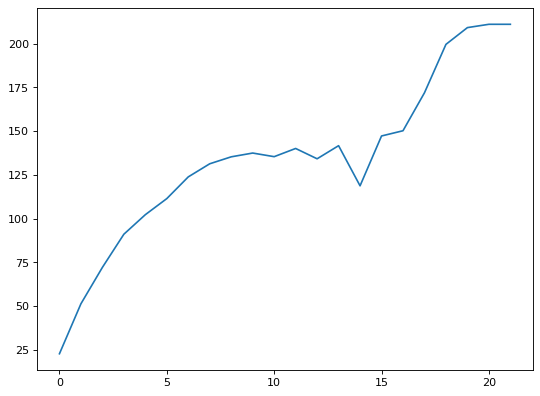

Surviving polynomials: 
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 + (1.0)x^1 + (41.0)
It produced 211 distinct primes on interval (0, 300).
(1.0)x^2 

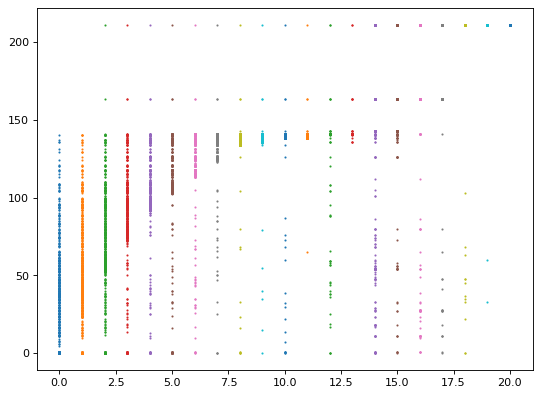

In [5]:
num_populations=1
merge_point=0.3
population_size=1000
target_population_size=5
test_interval=(0, 300)
birth_rate=0.8
mutation=0.1
coeffs_bound = (1, 45)
constraint = 4
poly_population = find_prime_polynomial(Poly_Population, 
                                   [Fitness.number_of_primes_in_interval],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   target_population_size=target_population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                        constraint=constraint)
show_average_fitness(poly_population)
show_final_polynomials(poly_population, test_interval)
show_scatter_fitness(poly_population)

## Tree-Population

In [ ]:
num_populations=1
merge_point=0.5
population_size=1000
target_population_size=5
test_interval=(0, 300)
birth_rate=0.85
mutation=0.01
coeffs_bound = (-50, 50)
constraint = 2
tree_population = find_prime_polynomial(Tree_Population, 
                                   [Fitness.number_of_primes_in_interval],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   target_population_size=target_population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                  constraint=constraint)
show_average_fitness(tree_population)
show_final_polynomials(tree_population, test_interval)
show_scatter_fitness(tree_population)

### Tree-Population, Experimenting with different functions